<a href="https://colab.research.google.com/github/JimmyStarling/mobilidade_urbana/blob/main/MobilidadeUrbana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicio

In [ ]:
#carrega bibliotecas
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

In [ ]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# carregar dataset
caminho = '/content/drive/MyDrive/Colab Notebooks/Equipe - Mobilidade Urbana/datasets/'
data_2010 = pd.read_csv(caminho + 'deslocamento_2010.csv')
#data_2019 = pd.read_csv(
#    caminho + 'deslocamento_2019.csv',
#    sep=',',
#    encoding='utf-8'
#) # Não utilizado

## Análise exploratória

In [ ]:
#data_2019.head(7)

,Nível,Cód.,"Brasil, Grande Região e Unidade da Federação",Situação do domicílio,Total,Coluna 1
0,BR,1,Brasil,Total,"4,8",Horas
1,GR,1,Norte,Total,"4,2",Horas
2,GR,2,Nordeste,Total,"4,3",Horas
3,GR,3,Sudeste,Total,"5,4",Horas
4,GR,4,Sul,Total,"3,9",Horas
5,GR,5,Centro-Oeste,Total,"4,6",Horas
6,UF,11,Rondônia,Total,"3,2",Horas


In [ ]:
# analisar dataset
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33390 entries, 0 to 33389
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Indice_busca                                    33390 non-null  object 
 1   Cod                                             33390 non-null  int64  
 2   Município                                       33390 non-null  object 
 3   Estado                                          33390 non-null  object 
 4   Tempo habitual de deslocamento para o trabalho  33390 non-null  object 
 5   Unnamed: 5                                      33390 non-null  int64  
 6   Tempo médio                                     33390 non-null  object 
 7   % acima de 1 hora                               33390 non-null  object 
 8   Unnamed: 8                                      0 non-null      float64
 9   Unnamed: 9                             

In [ ]:
# verificar primeiras linhas do dataset
data_2010.head()

,Indice_busca,Cod,Município,Estado,Tempo habitual de deslocamento para o trabalho,Unnamed: 5,Tempo médio,% acima de 1 hora,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,5200050 - Até cinco minutos,5200050,Abadia de Goiás,GO,Até cinco minutos,482,-,-,NaN,NaN,NaN,NaN,NaN
1,5200050 - De seis minutos até meia hora,5200050,Abadia de Goiás,GO,De seis minutos até meia hora,942,-,-,NaN,NaN,NaN,NaN,NaN
2,5200050 - Mais de duas horas,5200050,Abadia de Goiás,GO,Mais de duas horas,46,-,-,NaN,NaN,NaN,NaN,NaN
3,5200050 - Mais de meia hora até uma hora,5200050,Abadia de Goiás,GO,Mais de meia hora até uma hora,726,-,-,NaN,NaN,NaN,NaN,NaN
4,5200050 - Mais de uma hora até duas horas,5200050,Abadia de Goiás,GO,Mais de uma hora até duas horas,420,-,-,NaN,NaN,NaN,NaN,NaN


In [ ]:
# analisar medidas
data_2010.describe()

,Cod,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,3.339000e+04,3.339000e+04,0.0,0.0,6.000000,6.000000,1.000
mean,3.245264e+06,3.685890e+03,NaN,NaN,18555.833333,50.497333,53.968
std,9.991803e+05,3.230287e+04,NaN,NaN,21646.826580,45.356923,NaN
min,1.100015e+06,0.000000e+00,NaN,NaN,575.000000,3.000000,53.968
25%,2.512077e+06,1.020000e+02,NaN,NaN,3578.500000,20.246000,53.968
50%,3.145356e+06,5.320000e+02,NaN,NaN,9698.500000,35.992000,53.968
75%,4.119004e+06,1.885000e+03,NaN,NaN,28042.750000,78.750000,53.968
max,5.300108e+06,3.806276e+06,NaN,NaN,55667.000000,120.000000,53.968


In [ ]:
# Exibir nomes das colunas e somar a quantidade de valores NaN
data_2010.isna().sum()

,0
Indice_busca,0
Cod,0
Município,0
Estado,0
Tempo habitual de deslocamento para o trabalho,0
Unnamed: 5,0
Tempo médio,0
% acima de 1 hora,0
Unnamed: 8,33390
Unnamed: 9,33390


In [ ]:
#listar somente as colunas não úteis para esse dados (vazias ou nulas)
data_2010.columns[-5:]

Index(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

## Limpeza de dados e normalização

#### **Limpar dataset de 2010**

In [ ]:
# Como todas as colunas com NaN são somente colunas zeradas, podemos remove-las usando o dropna
df_normal = data_2010.drop(data_2010.columns[-5:], axis=1)
# Removemos também algumas colunas que não serão úteis para nosso estudo de caso
df_normal = df_normal.drop(columns='Indice_busca', axis=1)
df_normal = df_normal.drop(columns='% acima de 1 hora', axis=1)
df_normal = df_normal.drop(columns='Cod', axis=1)
df_normal = df_normal.drop(columns='Tempo médio', axis=1)
# Confere se aparecem os campos nulos
df_normal.isna().sum()

,0
Município,0
Estado,0
Tempo habitual de deslocamento para o trabalho,0
Unnamed: 5,0


In [ ]:
# Renomear o indice onde tem a quantidade de amostras
df_normal.rename(columns={'Unnamed: 5': 'Quantidade de Amostras'}, inplace=True)
# Exibir novamente a contagem das colunas
df_normal.isna().sum()

,0
Município,0
Estado,0
Tempo habitual de deslocamento para o trabalho,0
Quantidade de Amostras,0


#### **Limpar dataset de 2019** (Não utilizado)

In [ ]:
# Drop dos indices; atenção: fazer uma vez somente
#df_normal_2019 = data_2019.drop(data_2019.index[1:7]).reset_index(drop=True)
# Filtrar Bahia no df_2019
#df_bahia_2019 = df_normal_2019[
#    df_normal_2019['Brasil, Grande Região e Unidade da Federação'].str.strip() == 'Bahia'
#]

In [ ]:
#df_bahia_2019.head()

,Nível,Cód.,"Brasil, Grande Região e Unidade da Federação",Situação do domicílio,Total,Coluna 1
15,UF,29,Bahia,Total,"4,7",Horas


In [ ]:
# Converter 'Total'
#df_bahia_2019['Total'] = df_bahia_2019['Total'].str.replace(',', '.').astype(float)
#tempo_real_bahia_2019 = df_bahia_2019['Total'].values[0]

<ipython-input-15-d2ece651a9ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bahia_2019['Total'] = df_bahia_2019['Total'].str.replace(',', '.').astype(float)


In [ ]:
#df_bahia_2019.head()

,Nível,Cód.,"Brasil, Grande Região e Unidade da Federação",Situação do domicílio,Total,Coluna 1
15,UF,29,Bahia,Total,4.7,Horas


### Normalizar município e estado

In [ ]:
# Exibir os valores de estado atual no dataset
print(df_normal['Estado'].unique())

['GO' 'MG' 'PA' 'CE' 'BA' 'PR' 'SC' 'PE' 'TO' 'MA' 'RN' 'PI' 'RS' 'MT'
 'AC' 'SP' 'ES' 'PB' 'AL' 'MS' 'RO' 'RR' 'AM' 'AP' 'SE' 'RJ' 'DF']


In [ ]:
# transformar campos categóricos em numéricos
label_encoder_municipio = LabelEncoder()
label_encoder_municipio.fit(df_normal['Município'])
#df_normal['Município'] = label_encoder_municipio.transform(df_normal['Município'])

label_encoder_estado = LabelEncoder()
label_encoder_estado.fit(df_normal['Estado'])
#df_normal['Estado'] = label_encoder_estado.transform(df_normal['Estado'])

LabelEncoder()

Salvar estado do conjunto de dados de "estado" e municipios

In [ ]:
# Após normalizar é preciso salvar o estado e municipio da bahia codificado
# Salvar o encoder com a biblioteca joblib
joblib.dump(label_encoder_municipio, 'label_encoder_municipio.pkl')
joblib.dump(label_encoder_estado, 'label_encoder_estado.pkl')

['label_encoder_estado.pkl']

In [ ]:
# Após essa normalização e salvamento dos estados
# Exibimos a descrição dos dados que ainda não é compreensível
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33390 entries, 0 to 33389
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Município                                       33390 non-null  object
 1   Estado                                          33390 non-null  object
 2   Tempo habitual de deslocamento para o trabalho  33390 non-null  object
 3   Quantidade de Amostras                          33390 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


### Transformar o tempo médio em valor

In [ ]:
df_normal['Tempo habitual de deslocamento para o trabalho'].unique()

array(['Até cinco minutos', 'De seis minutos até meia hora',
       'Mais de duas horas', 'Mais de meia hora até uma hora',
       'Mais de uma hora até duas horas', 'Total'], dtype=object)

In [ ]:
# Transformar o tempo médio categórico em valor númerico

# Dicionário de mapeamento baseado na lógica de tempo médio em minutos
# Aqui são expressas médias do min e max de cada catégoria de tempo
# Exemplo 1 linha: "Até cinco minutos" significa de 0 min até 5. (0+5)/2 = 2.5 (mas arredondamos para 5 pois é o teto)
tempo_medio_em_minutos = {
    "Até cinco minutos": 5,
    "De seis minutos até meia hora": 18,
    "Mais de meia hora até uma hora": 45,
    "Mais de uma hora até duas horas": 90,
    "Mais de duas horas": 120,
}

# Aplicar mapeamento à coluna
df_normal['Tempo_minutos'] = df_normal['Tempo habitual de deslocamento para o trabalho'].map(tempo_medio_em_minutos)

# Verificar categorias não mapeadas
valores_invalidos = df_normal[df_normal['Tempo_minutos'].isnull()]['Tempo habitual de deslocamento para o trabalho'].unique()
if len(valores_invalidos) > 0:
    print("Categorias não mapeadas:", valores_invalidos)

# Remover linhas não utilizáveis (Total)
df_normal = df_normal[df_normal['Tempo_minutos'].notnull()]

# Normalizar proporcionalmente ao tempo máximo (2h = 120 minutos)
df_normal['Tempo_proporcional'] = df_normal['Tempo_minutos'] / 120

Categorias não mapeadas: ['Total']


<ipython-input-22-75706b331e6e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['Tempo_proporcional'] = df_normal['Tempo_minutos'] / 120


In [ ]:
df_normal.head(2)

,Município,Estado,Tempo habitual de deslocamento para o trabalho,Quantidade de Amostras,Tempo_minutos,Tempo_proporcional
0,Abadia de Goiás,GO,Até cinco minutos,482,5.0,0.041667
1,Abadia de Goiás,GO,De seis minutos até meia hora,942,18.0,0.150000


In [ ]:
# Descrever a tabela com as colunas criadas
df_normal.describe()

,Quantidade de Amostras,Tempo_minutos,Tempo_proporcional
count,2.782500e+04,27825.000000,27825.000000
mean,2.212387e+03,55.600000,0.463333
std,1.700054e+04,43.399397,0.361662
min,0.000000e+00,5.000000,0.041667
25%,6.900000e+01,18.000000,0.150000
50%,3.480000e+02,45.000000,0.375000
75%,1.128000e+03,90.000000,0.750000
max,1.346375e+06,120.000000,1.000000


In [ ]:
# Verifica se a linha "Total" foi removida
df_normal.columns.str.contains('Total', case=False).any()

np.False_

### Normalizar os categóricos restantes

In [ ]:
df_normal['Estado_cod'] = label_encoder_estado.fit_transform(df_normal['Estado'])
df_normal['Município_cod'] = label_encoder_municipio.fit_transform(df_normal['Município'])

In [ ]:
# Agrupar por município para representar dados por unidade
# Parte do antigo código
# df_municipios = df_normal.groupby(['Estado_cod']).agg({
#     'Quantidade de Amostras': 'sum',
#     'Tempo_minutos': 'mean'
# }).reset_index()

In [ ]:
# Exibi-los no describe
df_normal.describe()

,Quantidade de Amostras,Tempo_minutos,Tempo_proporcional,Estado_cod,Município_cod
count,2.782500e+04,27825.000000,27825.000000,27825.000000,27825.000000
mean,2.212387e+03,55.600000,0.463333,14.719137,2656.148787
std,1.700054e+04,43.399397,0.361662,7.260257,1532.278042
min,0.000000e+00,5.000000,0.041667,0.000000,0.000000
25%,6.900000e+01,18.000000,0.150000,10.000000,1321.000000
50%,3.480000e+02,45.000000,0.375000,14.000000,2664.000000
75%,1.128000e+03,90.000000,0.750000,22.000000,3988.000000
max,1.346375e+06,120.000000,1.000000,26.000000,5291.000000


#### Copiar os dados categóricos e remove-los do dataset

In [ ]:
df_normal.columns[:3]

Index(['Município', 'Estado',
       'Tempo habitual de deslocamento para o trabalho'],
      dtype='object')

In [ ]:
# Antes precisamos exibi-los
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27825 entries, 0 to 33388
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Município                                       27825 non-null  object 
 1   Estado                                          27825 non-null  object 
 2   Tempo habitual de deslocamento para o trabalho  27825 non-null  object 
 3   Quantidade de Amostras                          27825 non-null  int64  
 4   Tempo_minutos                                   27825 non-null  float64
 5   Tempo_proporcional                              27825 non-null  float64
 6   Estado_cod                                      27825 non-null  int64  
 7   Município_cod                                   27825 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [ ]:
# Realizar um backup de todos os dados
df_normal_backup = df_normal.copy()

In [ ]:
df_normal = df_normal.drop(df_normal.columns[:3], axis=1)

In [ ]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27825 entries, 0 to 33388
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quantidade de Amostras  27825 non-null  int64  
 1   Tempo_minutos           27825 non-null  float64
 2   Tempo_proporcional      27825 non-null  float64
 3   Estado_cod              27825 non-null  int64  
 4   Município_cod           27825 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


In [ ]:
df_normal = df_normal.rename(columns={'Quantidade de Amostras': 'Amostras'})
df_normal.head(2)

,Amostras,Tempo_minutos,Tempo_proporcional,Estado_cod,Município_cod
0,482,5.0,0.041667,8,0
1,942,18.0,0.150000,8,0


In [ ]:
df_normal.head(2)

,Amostras,Tempo_minutos,Tempo_proporcional,Estado_cod,Município_cod
0,482,5.0,0.041667,8,0
1,942,18.0,0.150000,8,0


In [ ]:
# Carregar os códigos de municipio e estado
label_encoder_estado = joblib.load('label_encoder_estado.pkl')
label_encoder_municipio = joblib.load('label_encoder_municipio.pkl')

In [ ]:
print("Exibir os códigos categóricos salvos: Bahia: {}, São Paulo {}.".format(label_encoder_estado.transform(['BA'])[0], label_encoder_estado.transform(['SP'])[0]))

Exibir os códigos categóricos salvos: Bahia: 4, São Paulo 25.


#### **Solução encontrada**

Compreender qual a melhor mobilidade e quais estados estão mais próximos

In [ ]:
tempo_medio_ponderado = df_normal['Tempo_minutos'] * df_normal['Amostras'] / df_normal['Amostras'].sum()
tempo_medio_ponderado

,0
0,0.000039
1,0.000275
2,0.000090
3,0.000531
4,0.000614
...,...
33384,0.000017
33385,0.000286
33386,0.000000
33387,0.000048


In [ ]:
# selecionar features/colunas utilizadas no treinamento
ba_codigo = label_encoder_estado.transform(['BA'])[0]
sp_codigo = label_encoder_estado.transform(['SP'])[0]
sc_codigo = label_encoder_estado.transform(['SC'])[0]
df_codigo = label_encoder_estado.transform(['DF'])[0]

# Supondo que 'Tempo_minutos' é a coluna que você quer resumir
estados = [ba_codigo, sp_codigo, sc_codigo, df_codigo]

# Filtra os estados desejados
df_filtrado = df_normal[df_normal['Estado_cod'].isin(estados)].copy()

In [ ]:
# Gerar um dataframe filtrado por estado(caso necessário)
df_filtrado

,Amostras,Tempo_minutos,Tempo_proporcional,Estado_cod,Município_cod
36,817,5.0,0.041667,4,8
37,1383,18.0,0.150000,4,8
38,33,120.0,1.000000,4,8
39,226,45.0,0.375000,4,8
40,172,90.0,0.750000,4,8
...,...,...,...,...,...
33384,213,5.0,0.041667,23,5256
33385,979,18.0,0.150000,23,5256
33386,0,120.0,1.000000,23,5256
33387,66,45.0,0.375000,23,5256


## Consolidação dos dados

#### Caso queira um gráfico mais específico basta substituir df_normal por df_filtrado

In [ ]:
consolidado = df_normal.groupby('Estado_cod').apply(
    lambda x: pd.Series({
        'Amostras': x['Amostras'].sum(),
        'Total_Tempo_Min': x['Tempo_minutos'].sum(),
        'Media_Ponderada_Tempo': (x['Tempo_minutos'] * x['Amostras']).sum() / x['Amostras'].sum()
    })
).reset_index()

<ipython-input-41-031899cc885f>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consolidado = df_normal.groupby('Estado_cod').apply(


In [ ]:
consolidado

,Estado_cod,Amostras,Total_Tempo_Min,Media_Ponderada_Tempo
0,0,178973.0,6116.0,23.673644
1,1,806077.0,28356.0,28.846170
2,2,919740.0,17236.0,34.308439
3,3,189946.0,4448.0,25.076353
4,4,4018889.0,115926.0,29.072461
5,5,2376763.0,51152.0,27.031132
6,6,985274.0,278.0,39.152722
7,7,1269066.0,21684.0,28.688280
8,8,2090399.0,68388.0,30.508680
9,9,1630208.0,60326.0,29.034948


**Legenda**

In [ ]:
# Obter todas as siglas de volta
siglas_estados = label_encoder_estado.classes_

# Obter os códigos correspondentes
codigos_estados = label_encoder_estado.transform(siglas_estados)

# Criar o DataFrame com código + sigla
df_estados = pd.DataFrame({
    'Estado_cod': codigos_estados,
    'Sigla': siglas_estados
})

# Visualizar
print(df_estados)

    Estado_cod Sigla
0            0    AC
1            1    AL
2            2    AM
3            3    AP
4            4    BA
5            5    CE
6            6    DF
7            7    ES
8            8    GO
9            9    MA
10          10    MG
11          11    MS
12          12    MT
13          13    PA
14          14    PB
15          15    PE
16          16    PI
17          17    PR
18          18    RJ
19          19    RN
20          20    RO
21          21    RR
22          22    RS
23          23    SC
24          24    SE
25          25    SP
26          26    TO


Qual a correlação entre os dados consolidados?

---


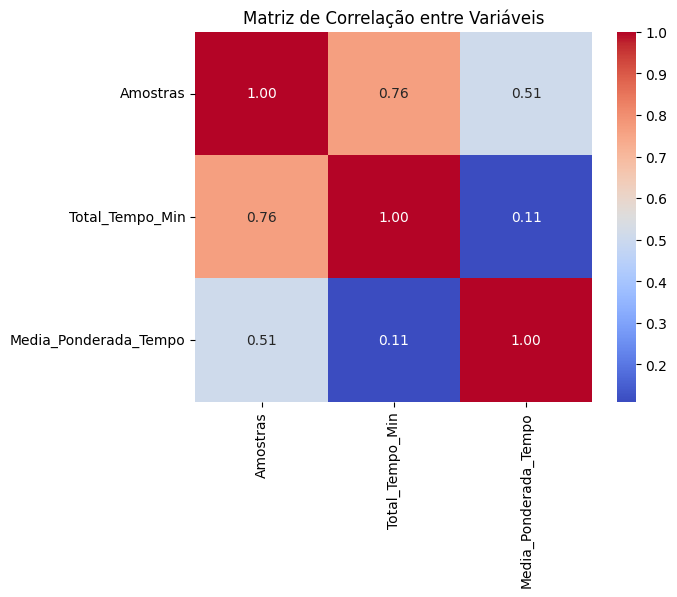

In [ ]:
consolidado = pd.DataFrame(consolidado)

# Remover a coluna 'Estado_cod' se for apenas ID
df_numerico = consolidado.drop(columns=['Estado_cod'])
# Adicionar a coluna Sigla
consolidado['Sigla'] = df_estados['Sigla']

# Matriz de correlação entre variáveis
correlacao = df_numerico.corr()

# Plot
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

## Plotagem de gráficos e uso do modelo de IA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
consolidado[['Tempo_medio']] = scaler.fit_transform(consolidado[['Total_Tempo_Min']])

<ipython-input-46-cccf448fc1c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


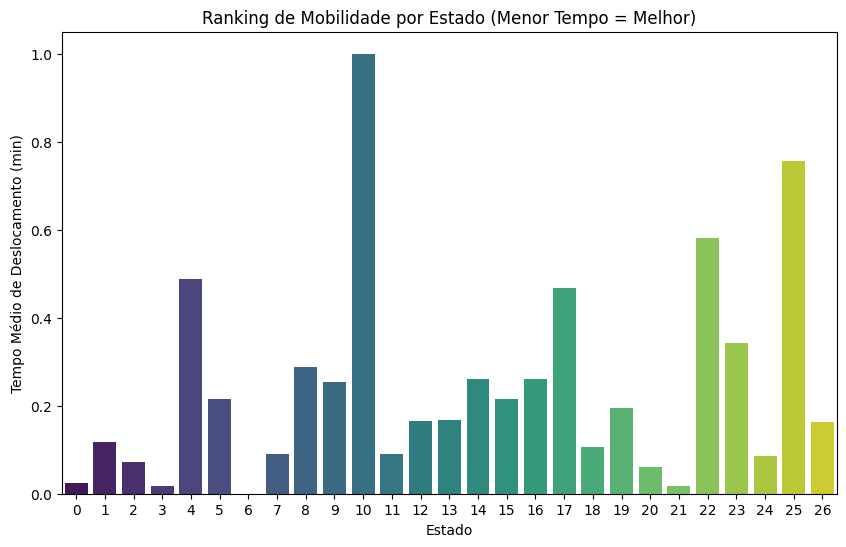

In [ ]:
# Ordenar pelo menor tempo médio
consolidado_sorted = consolidado.sort_values('Tempo_medio')

plt.figure(figsize=(10, 6))
sns.barplot(
    y='Tempo_medio',
    x='Estado_cod',
    data=consolidado_sorted,
    palette='viridis'
)
plt.xlabel("Estado")
plt.ylabel("Tempo Médio de Deslocamento (min)")
plt.title("Ranking de Mobilidade por Estado (Menor Tempo = Melhor)")
plt.show()

In [ ]:
import csv

# Preparar data para CSV
data_to_csv = zip(df_estados['Sigla'], consolidado['Tempo_medio'].round())
# Write to CSV file
with open(caminho+'ranking_estados.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Estados', 'Tempo Médio (em minutos)']) # Write header
    csv_writer.writerows(data_to_csv) # Write data

print("CSV file 'ranking_estados.csv' has been created.")


CSV file 'ranking_estados.csv' has been created.


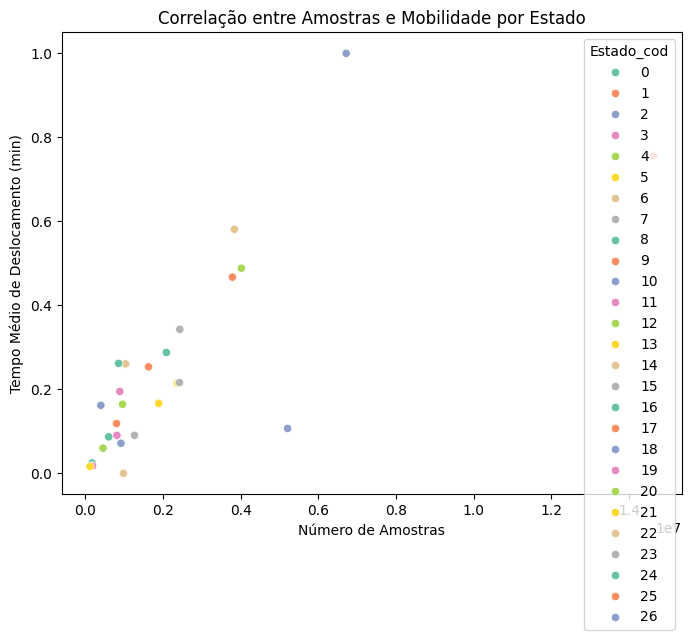

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Amostras',
    y='Tempo_medio',
    hue='Estado_cod',
    data=consolidado,
    palette='Set2'
)
plt.xlabel("Número de Amostras")
plt.ylabel("Tempo Médio de Deslocamento (min)")
plt.title("Correlação entre Amostras e Mobilidade por Estado")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features e target
X = consolidado[['Amostras', 'Estado_cod']]
y = consolidado['Tempo_medio']

# Separar treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R²: 0.47
RMSE: 0.08


In [ ]:
for nome, coef in zip(X.columns, modelo.coef_):
    print(f"{nome}: {coef:.4f}")

Amostras: 0.0000
Estado_cod: 0.0007


In [ ]:
consolidado.head()

,Estado_cod,Amostras,Total_Tempo_Min,Media_Ponderada_Tempo,Sigla,Tempo_medio
0,0,178973.0,6116.0,23.673644,AC,0.024648
1,1,806077.0,28356.0,28.846170,AL,0.118545
2,2,919740.0,17236.0,34.308439,AM,0.071596
3,3,189946.0,4448.0,25.076353,AP,0.017606
4,4,4018889.0,115926.0,29.072461,BA,0.488263


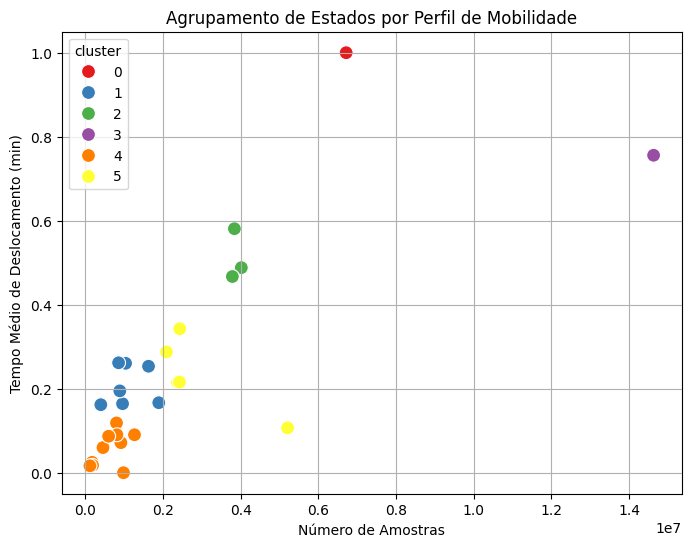

    Estado_cod    Amostras  Tempo_medio  cluster
0            0    178973.0     0.024648        4
1            1    806077.0     0.118545        4
2            2    919740.0     0.071596        4
3            3    189946.0     0.017606        4
4            4   4018889.0     0.488263        2
5            5   2376763.0     0.214789        5
6            6    985274.0     0.000000        4
7            7   1269066.0     0.090376        4
8            8   2090399.0     0.287559        5
9            9   1630208.0     0.253521        1
10          10   6716815.0     1.000000        0
11          11    817062.0     0.090376        4
12          12    961807.0     0.164319        1
13          13   1893802.0     0.166667        1
14          14   1040109.0     0.260563        1
15          15   2426444.0     0.215962        5
16          16    859830.0     0.261737        1
17          17   3788179.0     0.467136        2
18          18   5208580.0     0.106808        5
19          19    89

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo seu DataFrame já está assim:
# consolidado = pd.DataFrame([...])
# E já tem a coluna 'Tempo_medio'

# 1. Selecionar variáveis para cluster
X = consolidado[['Amostras', 'Tempo_medio']]

# 2. Normalizar (muito importante para KMeans!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Adicionar cluster ao DataFrame
consolidado['cluster'] = clusters

# 5. Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Amostras',
    y='Tempo_medio',
    hue='cluster',
    data=consolidado,
    palette='Set1',
    s=100
)
plt.title("Agrupamento de Estados por Perfil de Mobilidade")
plt.xlabel("Número de Amostras")
plt.ylabel("Tempo Médio de Deslocamento (min)")
plt.grid(True)
plt.show()

# 6. Ver como os estados ficaram agrupados
print(consolidado[['Estado_cod', 'Amostras', 'Tempo_medio', 'cluster']])


Verificar a acurácia do modelo

In [ ]:
from sklearn.metrics import accuracy_score

# Suponha que você já tenha as predições do modelo (y_pred)
# e os rótulos verdadeiros (y_true)

# Exemplo de dados:
y_true = [0, 1, 0, 1, 1, 0]  # Valores verdadeiros
y_pred = [0, 1, 0, 0, 1, 0]  # Valores previstos pelo modelo

# Calcular acurácia
accuracy = accuracy_score(y_true, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.83


#### Gráficos adicionais e métricas interessantes

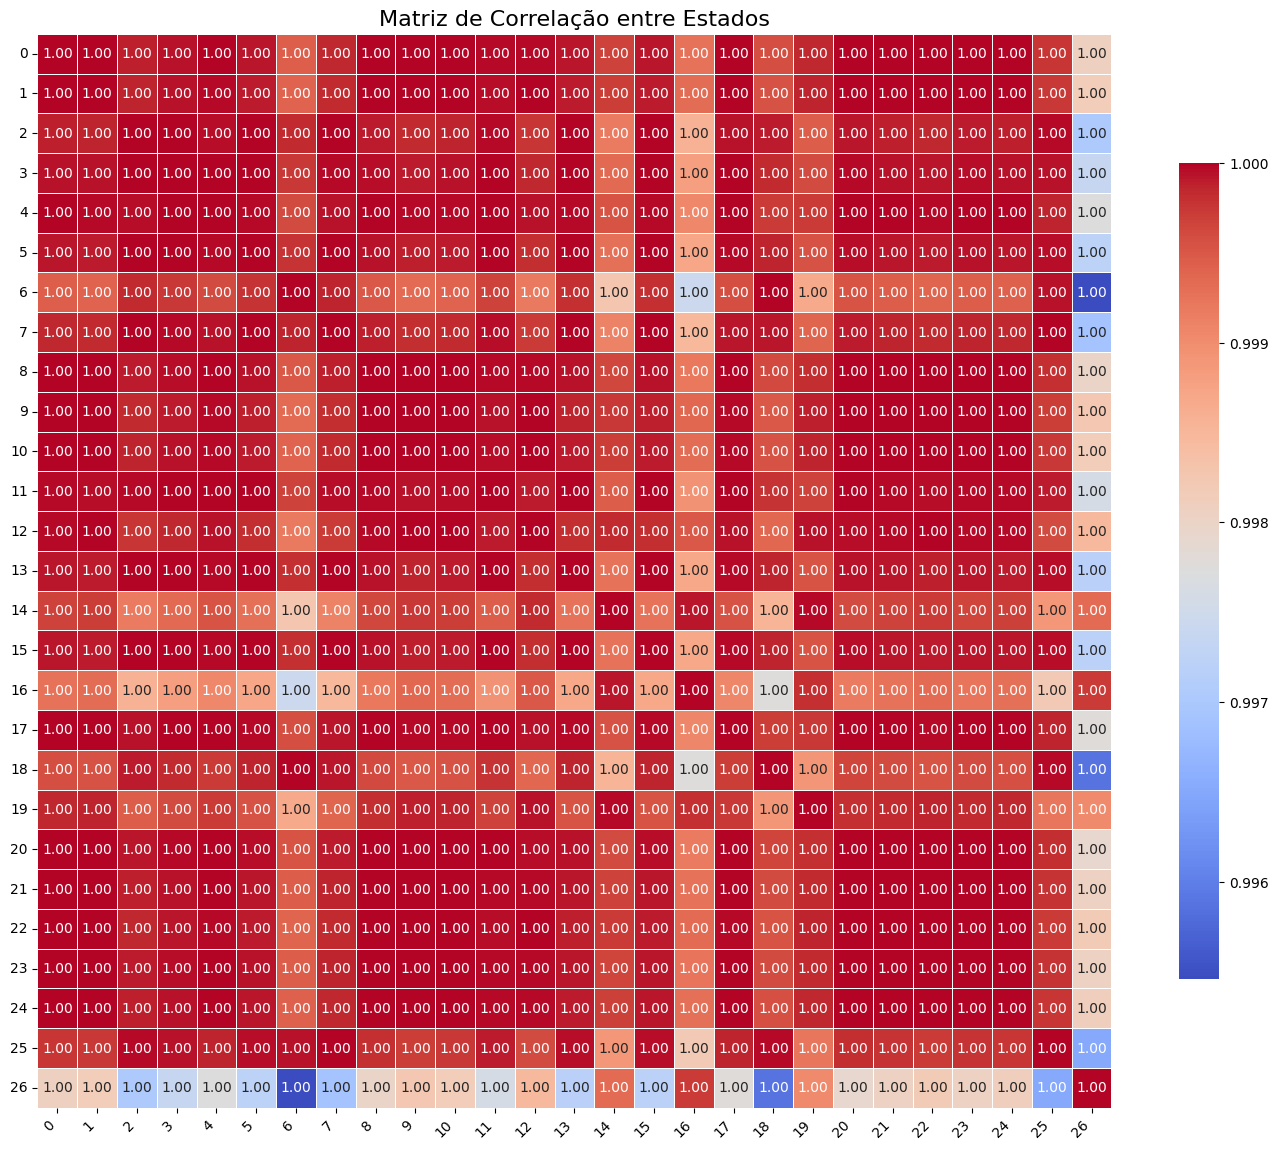

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remover a coluna 'Sigla' e transpor para que colunas sejam estados
df_transposto = consolidado.drop(columns=['Sigla']).T

# Calcular a matriz de correlação entre os estados
correlacao_estados = df_transposto.corr()

# Plotar matriz de correlação
plt.figure(figsize=(14, 12))  # aumentar tamanho da figura

sns.heatmap(
    correlacao_estados,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={'shrink': 0.7},
    square=True,
    linewidths=0.5
)

plt.title("Matriz de Correlação entre Estados", fontsize=16)

# Melhorar a rotação dos rótulos para legibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calcular a média dos tempos para cada estado (coluna)
media_estados = df_transposto.mean(axis=1)  # se linhas são observações e colunas estados

# Se precisar da média por estado (colunas), use axis=0:
media_estados = df_transposto.mean(axis=0)

# Calcular a distância euclidiana entre os vetores de médias dos estados
# Aqui precisamos dos vetores completos por estado, mas como médias são escala única,
# o melhor é comparar as médias diretamente, por exemplo, diferença absoluta:

from itertools import combinations

# Criar matriz de proximidade baseada na diferença absoluta das médias
estados = media_estados.index
distancias = pd.DataFrame(index=estados, columns=estados, dtype=float)

for e1, e2 in combinations(estados, 2):
    dist = abs(media_estados[e1] - media_estados[e2])
    distancias.loc[e1, e2] = dist
    distancias.loc[e2, e1] = dist

# Preencher diagonal com zero
np.fill_diagonal(distancias.values, 0)

print("Matriz de distância entre médias dos estados:")
print(distancias)


Matriz de distância entre médias dos estados:
              0             1             2             3             4   \
0   0.000000e+00  1.082250e+05  1.253166e+05  1.551566e+03  6.582893e+05   
1   1.082250e+05  0.000000e+00  1.709157e+04  1.066735e+05  5.500643e+05   
2   1.253166e+05  1.709157e+04  0.000000e+00  1.237650e+05  5.329727e+05   
3   1.551566e+03  1.066735e+05  1.237650e+05  0.000000e+00  6.567377e+05   
4   6.582893e+05  5.500643e+05  5.329727e+05  6.567377e+05  0.000000e+00   
5   3.738058e+05  2.655807e+05  2.484891e+05  3.722542e+05  2.844836e+05   
6   1.334141e+05  2.518903e+04  8.097462e+03  1.318625e+05  5.248752e+05   
7   1.842788e+05  7.605380e+04  5.896223e+04  1.827273e+05  4.740105e+05   
8   3.289522e+05  2.207271e+05  2.036356e+05  3.274006e+05  3.293371e+05   
9   2.509099e+05  1.426849e+05  1.255933e+05  2.493584e+05  4.073794e+05   
10  1.128146e+06  1.019921e+06  1.002829e+06  1.126594e+06  4.698566e+05   
11  1.089449e+05  7.198241e+02  1.637175e+

In [ ]:
consolidado.head(2)

,Estado_cod,Amostras,Total_Tempo_Min,Media_Ponderada_Tempo,Sigla,Tempo_medio,cluster
0,0,178973.0,6116.0,23.673644,AC,0.024648,1
1,1,806077.0,28356.0,28.846170,AL,0.118545,1
